<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana9/GradienteLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [2]:
G = (lambda x,y,z: 3*x - y - z - 1, \
     lambda x,y,z: -x + 3*y + z - 3, \
     lambda x,y,z: 2*x + y + 4*z - 7 )

In [3]:
def GetVectorF(G,r):

    v = np.zeros(len(G))
    for i in range(v.shape[0]):
        v[i] = G[i](r[0],r[1],r[2])

    return v

In [4]:
GetVectorF(G,np.array([1,3,1]))

array([-2.,  6.,  2.])

In [5]:
def GetJacobian(G,r,h=1e-4):

    J = np.zeros((r.shape[0],r.shape[0]))

    for i in range(r.shape[0]):
        J[i,0] = (G[i](r[0]+h,r[1],r[2]) - G[i](r[0]-h,r[1],r[2]))/(2*h)
        J[i,1] = (G[i](r[0],r[1]+h,r[2]) - G[i](r[0],r[1]-h,r[2]))/(2*h)
        J[i,2] = (G[i](r[0],r[1],r[2]+h) - G[i](r[0],r[1],r[2]-h))/(2*h)


    return J

In [6]:
GetJacobian(G,np.array([1,1,1]))

array([[ 3., -1., -1.],
       [-1.,  3.,  1.],
       [ 2.,  1.,  4.]])

In [7]:
def Metric(G,r):
  return 0.5*np.linalg.norm(GetVectorF(G,r))

In [8]:
Metric(G,np.array([1,1,1]))

np.float64(0.0)

In [9]:
def GetFig(R,W,it):

  fig = plt.figure(figsize=(6,4))
  ax = fig.add_subplot(1,2,1)

  ax.plot(R[:it])

  return ax

<Axes: >

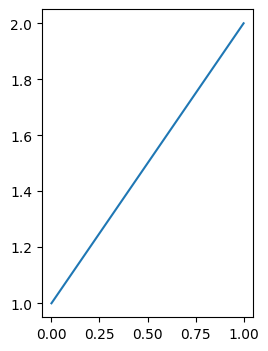

In [10]:
GetFig(np.array([1,2,3]),np.array([1,2,3]),2)

In [15]:
def Minimizer(G,r,lr=0.01,epochs=int(1e3),error=1e-4):

  metric = 1
  it = 0

  R = np.array([r])
  M = np.array([])

  while metric > error and it < epochs:

    # Metric
    M = np.append(M,Metric(G,r))

    # Gradient
    J = GetJacobian(G,r)
    Vector = GetVectorF(G,r)

    # Gradient descent
    r -= lr*np.dot(J.T,Vector)
    print(R)

    R = np.vstack((R,r))

    clear_output(wait=True)
    ax = GetFig(R,R,it)
    plt.show()

  return r





KeyboardInterrupt: 

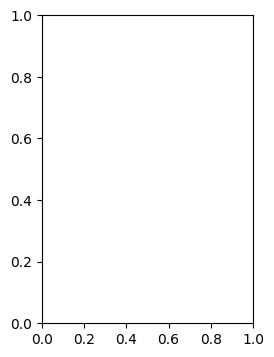

In [16]:
xsol = Minimizer(G,np.array([0.,0.,0.]))